# Lending Club EDA Part 2

The purpose of this notebook is data imputation or to clean up the missing data and prepare it for modeling completed after [EDA Part 1](https://github.com/ycauthen/springboard/blob/master/Capstone%20Project%202/lendingclub_eda%20_part_1.ipynb). I primarily use mean/median values, zeros and most frequent values. This step was performed after Lending Club EDA Part 1 where I visualize distributions in the data with only a few of the features that I felt had high feature importance. Here I fill all null values using mean, median, and highest frequency (most occurring) methods.

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from pandas_profiling import ProfileReport
import os
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import datetime as datetime
import pickle

In [2]:
pwd

'C:\\Users\\user\\Desktop\\springboard'

In [3]:
with open('lending_club_wrangling_pick.pkl', 'rb') as pickle_file:
    df = pickle.load(pickle_file)

In [4]:
df.shape

(2260668, 108)

I begin by looking at how many features have missing values.

In [5]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [6]:
miss_values = null_values(df)
miss_values.head(20)

Dataframe has 108 columns.
There are 71 columns that have missing values.


,Missing Values,% of Total Values
mths_since_last_record,1901512,84.1
mths_since_recent_bc_dlq,1740967,77.0
mths_since_last_major_derog,1679893,74.3
mths_since_recent_revol_delinq,1520309,67.3
next_pymnt_d,1345310,59.5
mths_since_last_delinq,1158502,51.2
il_util,1068850,47.3
mths_since_rcnt_il,909924,40.3
all_util,866348,38.3
open_acc_6m,866130,38.3


There are 5 features that have equal to or greater than 60 percent of data missing. I won't be removing these features right now but we can see how my imuptation methods will affect them in the later modeling stages.

In [7]:
print(df.isnull().sum().to_string())

loan_amnt                               0
funded_amnt                             0
funded_amnt_inv                         0
term                                    0
int_rate                                0
installment                             0
grade                                   0
sub_grade                               0
emp_length                              0
home_ownership                          0
annual_inc                              4
verification_status                     0
issue_d                                 0
loan_status                             0
pymnt_plan                              0
purpose                                 0
addr_state                              0
dti                                  1711
delinq_2yrs                            29
earliest_cr_line                       29
fico_range_low                          0
fico_range_high                         0
inq_last_6mths                         30
mths_since_last_delinq            

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#pd.reset_option('display.float_format')

In [9]:
pd.set_option('display.max_columns', None)

Here I am just setting the display option to be able to see all the features horizontally.

There are only 4 missing values from annual income. It's not super important we fill these values, but I wanted to take a look at how annual income was distributed across the board.

# Data Imputation:

# 1. annual_inc

In [10]:
df[df['annual_inc'].isna() == True]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
1654329,5000.00000,5000.00000,3025.00000,36 months,7.43000,155.38000,A,A2,1,NONE,nan,Not Verified,2007-08-01,Does not meet the credit policy. Status:Fully ...,n,other,NY,1.00000,nan,NaT,800.00000,804.00000,nan,nan,nan,nan,nan,0.00000,nan,nan,f,0.00000,0.00000,5593.63161,3384.14000,5000.00000,593.63000,0.00000,0.00000,0.00000,2010-08-01,157.31000,2010-09-01,2007-05-01,804.00000,800.00000,nan,nan,1.00000,Individual,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,Cash,N
1654330,7000.00000,7000.00000,3450.00000,36 months,7.75000,218.55000,A,A3,1,NONE,nan,Not Verified,2007-08-01,Does not meet the credit policy. Status:Fully ...,n,other,NY,1.00000,nan,NaT,800.00000,804.00000,nan,nan,nan,nan,nan,0.00000,nan,nan,f,0.00000,0.00000,7867.65587,3877.63000,7000.00000,867.66000,0.00000,0.00000,0.00000,2010-08-01,220.03000,2010-09-01,2007-05-01,804.00000,800.00000,nan,nan,1.00000,Individual,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,Cash,N
1654360,6700.00000,6700.00000,6700.00000,36 months,7.75000,209.18000,A,A3,1,NONE,nan,Not Verified,2007-07-01,Does not meet the credit policy. Status:Fully ...,n,other,NY,1.00000,nan,NaT,800.00000,804.00000,nan,nan,nan,nan,nan,0.00000,nan,nan,f,0.00000,0.00000,7530.48143,7530.48000,6700.00000,830.48000,0.00000,0.00000,0.00000,2010-07-01,209.89000,2010-08-01,2007-05-01,804.00000,800.00000,nan,nan,1.00000,Individual,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,Cash,N
1654413,6500.00000,6500.00000,0.00000,36 months,8.38000,204.84000,A,A5,1,NONE,nan,Not Verified,2007-06-01,Does not meet the credit policy. Status:Fully ...,n,other,NY,4.00000,nan,NaT,740.00000,744.00000,nan,nan,nan,nan,nan,0.00000,nan,nan,f,0.00000,0.00000,7373.90496,0.00000,6500.00000,873.90000,0.00000,0.00000,0.00000,2010-06-01,205.32000,2010-07-01,2007-08-01,724.00000,720.00000,nan,nan,1.00000,Individual,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

In [11]:
df['annual_inc'].describe()

count     2260664.00000
mean        77992.42869
std        112696.19957
min             0.00000
25%         46000.00000
50%         65000.00000
75%         93000.00000
max     110000000.00000
Name: annual_inc, dtype: float64

Right off the bat we see that there are major outliers that need to be addressed. It seems unlikely that an individual who is making $110 million dollars a year would be taking out any kind of personal loan.

<AxesSubplot:xlabel='annual_inc'>

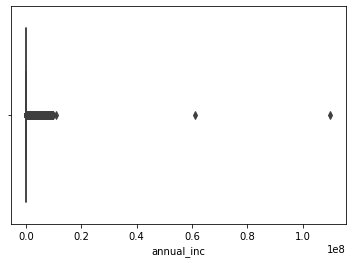

In [12]:
import seaborn as sns
sns.boxplot(x=df['annual_inc'])

In [13]:
df[df['annual_inc'].isna() == True]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
1654329,5000.00000,5000.00000,3025.00000,36 months,7.43000,155.38000,A,A2,1,NONE,nan,Not Verified,2007-08-01,Does not meet the credit policy. Status:Fully ...,n,other,NY,1.00000,nan,NaT,800.00000,804.00000,nan,nan,nan,nan,nan,0.00000,nan,nan,f,0.00000,0.00000,5593.63161,3384.14000,5000.00000,593.63000,0.00000,0.00000,0.00000,2010-08-01,157.31000,2010-09-01,2007-05-01,804.00000,800.00000,nan,nan,1.00000,Individual,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,Cash,N
1654330,7000.00000,7000.00000,3450.00000,36 months,7.75000,218.55000,A,A3,1,NONE,nan,Not Verified,2007-08-01,Does not meet the credit policy. Status:Fully ...,n,other,NY,1.00000,nan,NaT,800.00000,804.00000,nan,nan,nan,nan,nan,0.00000,nan,nan,f,0.00000,0.00000,7867.65587,3877.63000,7000.00000,867.66000,0.00000,0.00000,0.00000,2010-08-01,220.03000,2010-09-01,2007-05-01,804.00000,800.00000,nan,nan,1.00000,Individual,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,Cash,N
1654360,6700.00000,6700.00000,6700.00000,36 months,7.75000,209.18000,A,A3,1,NONE,nan,Not Verified,2007-07-01,Does not meet the credit policy. Status:Fully ...,n,other,NY,1.00000,nan,NaT,800.00000,804.00000,nan,nan,nan,nan,nan,0.00000,nan,nan,f,0.00000,0.00000,7530.48143,7530.48000,6700.00000,830.48000,0.00000,0.00000,0.00000,2010-07-01,209.89000,2010-08-01,2007-05-01,804.00000,800.00000,nan,nan,1.00000,Individual,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,Cash,N
1654413,6500.00000,6500.00000,0.00000,36 months,8.38000,204.84000,A,A5,1,NONE,nan,Not Verified,2007-06-01,Does not meet the credit policy. Status:Fully ...,n,other,NY,4.00000,nan,NaT,740.00000,744.00000,nan,nan,nan,nan,nan,0.00000,nan,nan,f,0.00000,0.00000,7373.90496,0.00000,6500.00000,873.90000,0.00000,0.00000,0.00000,2010-06-01,205.32000,2010-07-01,2007-08-01,724.00000,720.00000,nan,nan,1.00000,Individual,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

In [14]:
df['annual_inc'] = df['annual_inc'].fillna(0)

I decided to keep the rows and replace annual inc with 0 instead of dropping them because the loan status type falls into a minority category.

# 2. dti

In [15]:
df['dti'].describe()

count   2258957.00000
mean         18.82420
std          14.18333
min          -1.00000
25%          11.89000
50%          17.84000
75%          24.49000
max         999.00000
Name: dti, dtype: float64

In [16]:
df['dti'] = df['dti'].fillna(0)

There are evident outliers again w.r.t a debt to income ratio of 999. I fill these values with 0 because there are not that many missing.

# 3. delinq_2yrs

Again, there aren't that many values missing so I'll just replace with 0.

In [17]:
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(0)

# 4. earliest_cr_line

This feature was in date time format and represents the month the borrower's earliest reported credit line was opened. I just replaced the values with the most fequently occuring date.

In [18]:
df[df['earliest_cr_line'].isna() == True]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
1654329,5000.00000,5000.00000,3025.00000,36 months,7.43000,155.38000,A,A2,1,NONE,0.00000,Not Verified,2007-08-01,Does not meet the credit policy. Status:Fully ...,n,other,NY,1.00000,0.00000,NaT,800.00000,804.00000,nan,nan,nan,nan,nan,0.00000,nan,nan,f,0.00000,0.00000,5593.63161,3384.14000,5000.00000,593.63000,0.00000,0.00000,0.00000,2010-08-01,157.31000,2010-09-01,2007-05-01,804.00000,800.00000,nan,nan,1.00000,Individual,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,Cash,N
1654330,7000.00000,7000.00000,3450.00000,36 months,7.75000,218.55000,A,A3,1,NONE,0.00000,Not Verified,2007-08-01,Does not meet the credit policy. Status:Fully ...,n,other,NY,1.00000,0.00000,NaT,800.00000,804.00000,nan,nan,nan,nan,nan,0.00000,nan,nan,f,0.00000,0.00000,7867.65587,3877.63000,7000.00000,867.66000,0.00000,0.00000,0.00000,2010-08-01,220.03000,2010-09-01,2007-05-01,804.00000,800.00000,nan,nan,1.00000,Individual,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,Cash,N
1654339,4350.00000,4350.00000,825.00000,36 months,8.07000,136.45000,A,A4,1,RENT,120000.00000,Not Verified,2007-08-01,Does not meet the credit policy. Status:Fully ...,n,other,MA,4.00000,0.00000,NaT,740.00000,744.00000,nan,nan,nan,nan,nan,0.00000,nan,nan,f,0.00000,0.00000,4911.99274,931.59000,4350.00000,561.99000,0.00000,0.00000,0.00000,2010-08-01,139.93000,2010-09-01,NaT,0.00000,0.00000,nan,nan,1.00000,Individual,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,Cash,N
1654352,3900.00000,3900.00000,2025.00000,36 months,9.33000,124.62000,B,B3,1,RENT,98000.00000,Not Verified,2007-08-01,Does not meet the credit policy. Status:Fully ...,n,other,NY,10.00000,0.00000,NaT,705.00000,709.00000,nan,nan,nan,nan,nan,0.00000,nan,nan,f,0.00000,0.00000,4486.17297,2329.36000,3900.00000,586.17000,0.00000,0.00000,0.00000,2010-08-01,126.06000,2010-09-01,2007-05-01,709.00000,705.00000,nan,nan,1.00000,Individual,nan,nan,na

In [19]:
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'].fillna('2004-09-01'))

In [20]:
df['earliest_cr_line'].value_counts()

2004-09-01    15429
2003-09-01    15215
2005-09-01    14780
2003-08-01    14669
2004-08-01    14413
              ...  
1952-11-01        1
1955-11-01        1
1954-10-01        1
1946-01-01        1
1957-08-01        1
Name: earliest_cr_line, Length: 754, dtype: int64

# 5. inq_last_6mths

This feature represents number of inquities excluding auto and mortage inquiries. Most values looked to be distributed between 0 and 1 so I chose 0. 

In [21]:
df['inq_last_6mths'].describe()

count   2260638.00000
mean          0.57684
std           0.88596
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max          33.00000
Name: inq_last_6mths, dtype: float64

In [22]:
df['inq_last_6mths'].value_counts()

0.00000     1381722
1.00000      584390
2.00000      200212
3.00000       69009
4.00000       17380
5.00000        6232
6.00000        1231
7.00000         195
8.00000         122
9.00000          50
10.00000         24
12.00000         15
11.00000         15
15.00000          9
13.00000          6
14.00000          6
18.00000          4
16.00000          3
17.00000          2
19.00000          2
24.00000          2
31.00000          1
33.00000          1
20.00000          1
25.00000          1
27.00000          1
28.00000          1
32.00000          1
Name: inq_last_6mths, dtype: int64

In [23]:
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(0)

# 6. mths_since_last_delinq

I will make a hypothesis and say this month has high feature importance because it represents the number of months since the borrow's last delinquency. It will be useful in out analysis later. Since the mean was faily close to the median I chose to fill the NA values with mean.

In [24]:
df['mths_since_last_delinq'].value_counts()

12.00000     20967
13.00000     20629
6.00000      20615
9.00000      20345
7.00000      20139
             ...  
157.00000        1
139.00000        1
168.00000        1
147.00000        1
143.00000        1
Name: mths_since_last_delinq, Length: 173, dtype: int64

In [25]:
df['mths_since_last_delinq'].describe()

count   1102166.00000
mean         34.54092
std          21.90047
min           0.00000
25%          16.00000
50%          31.00000
75%          50.00000
max         226.00000
Name: mths_since_last_delinq, dtype: float64

In [26]:
df['mths_since_last_delinq'].sort_values(ascending = False)

475284    226.00000
2082954   202.00000
2229675   195.00000
1082636   192.00000
1092172   188.00000
             ...   
2260689         nan
2260690         nan
2260691         nan
2260693         nan
2260694         nan
Name: mths_since_last_delinq, Length: 2260668, dtype: float64

In [27]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].mean())

# 7. mths_since_last_record

This features describes the montsh since the borrower's last public record. Mean and median are pretty close here so I filled null values with mean.

In [28]:
df['mths_since_last_record'].describe()

count   359156.00000
mean        72.31284
std         26.46409
min          0.00000
25%         55.00000
50%         74.00000
75%         92.00000
max        129.00000
Name: mths_since_last_record, dtype: float64

In [29]:
df['mths_since_last_record'].value_counts()

79.00000     5448
80.00000     5434
82.00000     5405
77.00000     5356
76.00000     5326
             ... 
122.00000       6
126.00000       4
125.00000       3
129.00000       1
127.00000       1
Name: mths_since_last_record, Length: 129, dtype: int64

In [30]:
df['mths_since_last_record'] = df['mths_since_last_record'].fillna(df['mths_since_last_record'].mean())

# 8. open_acc

Filled w/ mean for aformentioned reason

In [31]:
df['open_acc'].unique()
df['open_acc'].describe()
df['open_acc'].sort_values(ascending = False)

1496770   101.00000
2175269    97.00000
1475826    94.00000
576766     93.00000
608141     91.00000
             ...   
1654410         nan
1654411         nan
1654412         nan
1654413         nan
1654414         nan
Name: open_acc, Length: 2260668, dtype: float64

In [32]:
df['open_acc'] = df['open_acc'].fillna(df['open_acc'].mean())

# 9. pub_rec

Number of derogatory public records, most of them seem to be 0 so filled with most frequent

In [33]:
df['pub_rec'].describe()

count   2260639.00000
mean          0.19753
std           0.57052
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max          86.00000
Name: pub_rec, dtype: float64

In [34]:
df['pub_rec'].value_counts()

0.00000     1902758
1.00000      305390
2.00000       34154
3.00000       10567
4.00000        3872
5.00000        1843
6.00000         933
7.00000         427
8.00000         243
9.00000         143
10.00000         91
11.00000         58
12.00000         35
13.00000         30
14.00000         12
15.00000         11
16.00000         11
19.00000          9
21.00000          6
18.00000          6
17.00000          5
24.00000          4
28.00000          4
22.00000          3
20.00000          3
23.00000          2
49.00000          2
61.00000          2
44.00000          1
54.00000          1
52.00000          1
47.00000          1
46.00000          1
45.00000          1
37.00000          1
40.00000          1
34.00000          1
32.00000          1
31.00000          1
26.00000          1
25.00000          1
86.00000          1
63.00000          1
Name: pub_rec, dtype: int64

In [35]:
df['pub_rec'] = df['pub_rec'].fillna(0)

# 10. revol_util

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. Filled with 0 since not very many missing. 

In [36]:
df['revol_util'].describe()

count   2258866.00000
mean         50.33770
std          24.71307
min           0.00000
25%          31.50000
50%          50.30000
75%          69.40000
max         892.30000
Name: revol_util, dtype: float64

In [37]:
df['revol_util'].value_counts()

0.00000      13069
57.00000      4324
48.00000      4283
59.00000      4272
61.00000      4223
             ...  
0.49000          1
1.88000          1
126.90000        1
126.60000        1
165.80000        1
Name: revol_util, Length: 1430, dtype: int64

In [38]:
df['revol_util'] = df['revol_util'].fillna(0)

# 11. total_acc

The total number of credit lines currently in the borrower's credit file. Filled with mean since it was similar to median.

In [39]:
df['total_acc'].describe()

count   2260639.00000
mean         24.16255
std          11.98753
min           1.00000
25%          15.00000
50%          22.00000
75%          31.00000
max         176.00000
Name: total_acc, dtype: float64

In [40]:
df['total_acc'].value_counts()

20.00000     82570
19.00000     82012
18.00000     81931
17.00000     81378
21.00000     81170
             ...  
145.00000        1
128.00000        1
141.00000        1
130.00000        1
176.00000        1
Name: total_acc, Length: 152, dtype: int64

In [41]:
df['total_acc'] = df['total_acc'].fillna(df['total_acc'].mean())

# 12. last_pymnt_d

Last month payment was recieved. Filled with most frequent dates.

In [42]:
df['last_pymnt_d'].sort_values(ascending = False)

2260698   2019-03-01
897816    2019-03-01
897796    2019-03-01
897800    2019-03-01
897802    2019-03-01
             ...    
2259027          NaT
2259076          NaT
2259169          NaT
2259272          NaT
2259718          NaT
Name: last_pymnt_d, Length: 2260668, dtype: datetime64[ns]

In [43]:
df['last_pymnt_d'].value_counts()

2019-03-01    853003
2019-02-01     97074
2018-08-01     39615
2019-01-01     38483
2018-03-01     38269
               ...  
2008-06-01        20
2008-03-01        18
2008-01-01        11
2008-02-01         8
2007-12-01         2
Name: last_pymnt_d, Length: 136, dtype: int64

In [44]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'].fillna('2019-03-01'))

# 13. next_pymnt_d

Filled with most recurring dates. There are only 5 datetime features.

In [45]:
df['next_pymnt_d'].sort_values(ascending = False)

883613    2019-05-01
532323    2019-05-01
789268    2019-05-01
2231232   2019-05-01
501936    2019-05-01
             ...    
2260688          NaT
2260690          NaT
2260691          NaT
2260692          NaT
2260697          NaT
Name: next_pymnt_d, Length: 2260668, dtype: datetime64[ns]

In [46]:
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'].fillna('2019-05-01'))

# 14. last_credit_pull_d

The most recent month LC pulled credit for this loan. Filled NA with most frequent.

In [47]:
df['last_credit_pull_d'].value_counts(ascending = False)

2019-03-01    1371381
2019-02-01      76956
2019-01-01      63283
2018-07-01      54113
2016-10-01      50983
               ...   
2019-04-01          2
2007-12-01          2
2007-07-01          1
2008-07-01          1
2008-06-01          1
Name: last_credit_pull_d, Length: 141, dtype: int64

In [48]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'].fillna('2019-03-01'))

# 15. collections_12_mths_ex_med

In [49]:
df['collections_12_mths_ex_med'].describe()

count   2260523.00000
mean          0.01815
std           0.15081
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max          20.00000
Name: collections_12_mths_ex_med, dtype: float64

In [50]:
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

# 16. mths_since_last_major_derog

In [51]:
print(df['mths_since_last_major_derog'].value_counts(ascending = False).to_string())

45.00000     9181
43.00000     9126
42.00000     9096
44.00000     9082
46.00000     9042
48.00000     8978
40.00000     8962
41.00000     8881
47.00000     8866
38.00000     8864
39.00000     8753
37.00000     8654
49.00000     8636
36.00000     8613
35.00000     8321
32.00000     8269
34.00000     8265
31.00000     8257
28.00000     8210
29.00000     8202
33.00000     8196
26.00000     8150
58.00000     8109
54.00000     8080
30.00000     8060
56.00000     8048
52.00000     8018
62.00000     7999
64.00000     7977
27.00000     7974
65.00000     7959
53.00000     7958
25.00000     7957
59.00000     7942
67.00000     7942
66.00000     7936
57.00000     7910
60.00000     7910
68.00000     7887
51.00000     7877
55.00000     7869
63.00000     7869
69.00000     7840
70.00000     7825
50.00000     7822
61.00000     7818
24.00000     7760
71.00000     7465
73.00000     7370
72.00000     7361
22.00000     7276
23.00000     7211
21.00000     7134
74.00000     7020
20.00000     6850
19.00000  

In [52]:
df['mths_since_last_major_derog'].mean()

44.16422022297792

In [53]:
df['mths_since_last_major_derog'] = df['mths_since_last_major_derog'].fillna(df['mths_since_last_major_derog'].mean())

# 17, 18. acc_now_delinq, tot_coll_amt

The number of accounts on which the borrower is now delinquent, and Total collection amounts ever owed. Filled with 0 

In [54]:
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(0)

In [55]:
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)

# 19. tot_cur_bal Creating A Target Variable for Defaulted Loans 

In [56]:
df['tot_cur_bal'].describe()

count   2190392.00000
mean     142492.19520
std      160692.64062
min           0.00000
25%       29092.00000
50%       79240.00000
75%      213204.00000
max     9971659.00000
Name: tot_cur_bal, dtype: float64

Here I show just how imbalanced the dataset is and example the distribution of the tot_cur_bal feature via kernel density plot to see how Defaulted loans compare to the overall data.

In [57]:
target_list = [1 if i=='Default' else 0 for i in df['loan_status']]

df['TARGET'] = target_list
df['TARGET'].value_counts()

0    2260628
1         40
Name: TARGET, dtype: int64

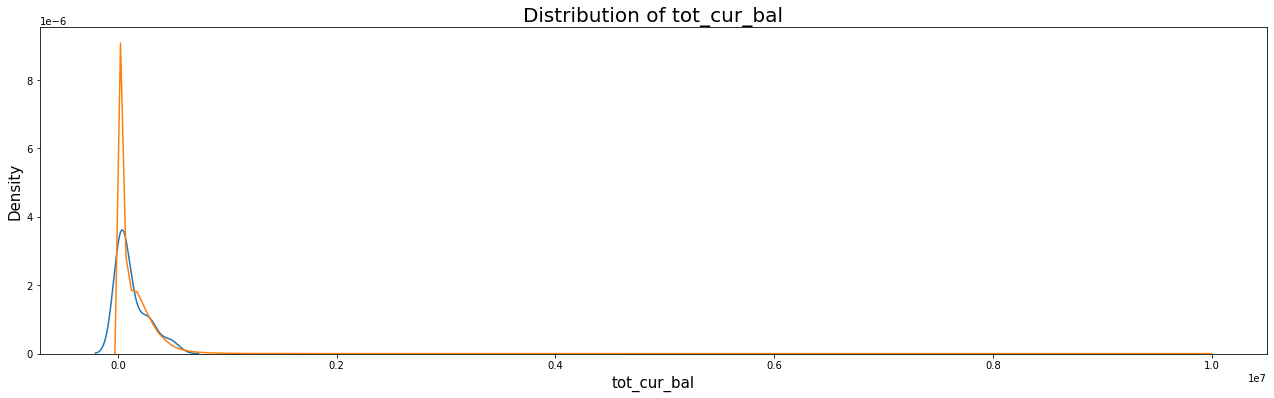

In [58]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['TARGET'] == 1, 'tot_cur_bal'], label = 'target = 1')
sns.kdeplot(df.loc[df['TARGET'] == 0, 'tot_cur_bal'], label = 'target = 0');
plt.xlabel('tot_cur_bal',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of tot_cur_bal',fontsize=20);

In [59]:
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(df['tot_cur_bal'].mean())

I assume it's safe to take the mean because it follows a similar distribution.

# 20. tax_liens

In [60]:
df['tax_liens'].value_counts()

0.00000     2195933
1.00000       43638
2.00000       12172
3.00000        4456
4.00000        2007
5.00000        1026
6.00000         557
7.00000         265
8.00000         160
9.00000         103
10.00000         75
11.00000         40
12.00000         26
13.00000         17
15.00000         14
14.00000         12
17.00000          8
16.00000          6
21.00000          6
18.00000          6
22.00000          5
19.00000          3
20.00000          3
27.00000          3
61.00000          2
24.00000          2
46.00000          2
45.00000          2
39.00000          1
53.00000          1
52.00000          1
48.00000          1
44.00000          1
34.00000          1
37.00000          1
85.00000          1
30.00000          1
29.00000          1
28.00000          1
25.00000          1
23.00000          1
63.00000          1
Name: tax_liens, dtype: int64

In [61]:
df['tax_liens'] = df['tax_liens'].fillna(0)

Filled with 0s because it is the most common occuring value.

# 21 - 27. delinq_amnt, open_acc_6m, open_act_il, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il

In [62]:
print(df['delinq_amnt'].value_counts().to_string())

0.00000         2253465
25.00000            124
65000.00000         109
30.00000             85
53.00000             72
54.00000             69
75.00000             65
50.00000             64
56.00000             58
57.00000             56
52.00000             46
40.00000             45
35.00000             45
27.00000             43
58.00000             43
55.00000             39
59.00000             39
60.00000             36
15.00000             35
38.00000             33
51.00000             33
70.00000             32
32.00000             29
31.00000             28
61.00000             26
62.00000             26
20.00000             26
74.00000             26
76.00000             25
34.00000             25
36.00000             23
42.00000             22
80.00000             22
66.00000             22
29.00000             22
45.00000             21
69.00000             21
48.00000             21
46.00000             20
10.00000             19
67.00000             19
43.00000        

In [63]:
df['delinq_amnt'] = df['delinq_amnt'].fillna(0)

In [64]:
df['open_acc_6m'] = df['open_acc_6m'].fillna(0)

In [65]:
df['open_act_il'] = df['open_act_il'].fillna(0)

In [66]:
df['open_il_12m'] = df['open_il_12m'].fillna(0)

In [67]:
df['open_il_24m'] = df['open_il_24m'].fillna(0)

In [68]:
df['mths_since_rcnt_il'] = df['mths_since_rcnt_il'].fillna(0)

In [69]:
df['total_bal_il']
df['total_bal_il'] = df['total_bal_il'].fillna(0)

# 28. il_util

In [70]:
df['il_util'].describe()

count   1191818.00000
mean         69.14098
std          23.74839
min           0.00000
25%          55.00000
50%          72.00000
75%          86.00000
max        1000.00000
Name: il_util, dtype: float64

In [71]:
print(df['il_util'].value_counts().to_string())

78.00000      22659
75.00000      22425
81.00000      22330
83.00000      22286
72.00000      22023
77.00000      21852
80.00000      21737
82.00000      21553
74.00000      21496
79.00000      21478
85.00000      21471
76.00000      21448
73.00000      21272
69.00000      21077
86.00000      21039
71.00000      20679
84.00000      20635
70.00000      20590
67.00000      19883
88.00000      19640
87.00000      19407
68.00000      19250
89.00000      18663
64.00000      18623
66.00000      18382
65.00000      18189
90.00000      17823
63.00000      17307
61.00000      17086
92.00000      16931
91.00000      16833
62.00000      16681
93.00000      15888
60.00000      15787
58.00000      15653
94.00000      15170
59.00000      15108
56.00000      14575
100.00000     14373
57.00000      14020
95.00000      13891
55.00000      13494
96.00000      13222
53.00000      13192
54.00000      12877
97.00000      12554
52.00000      12215
50.00000      12062
98.00000      11776
51.00000      11499


<AxesSubplot:xlabel='il_util'>

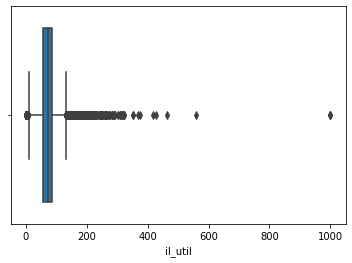

In [72]:
sns.boxplot(x=df['il_util'])

In [73]:
df['il_util'] = df['il_util'].fillna(df['il_util'].mean())

Filling NA with mean values seemed viable.

# 29 - 31. open_rv_12m, open_rv_24m, max_bal_bc

In [74]:
df['open_rv_12m'] = df['open_rv_12m'].fillna(0)

In [75]:
df['open_rv_24m'] = df['open_rv_24m'].fillna(0)

In [76]:
df['max_bal_bc'] = df['max_bal_bc'].fillna(0)

# 32. all_util

In [77]:
df['all_util'].describe()

count   1394320.00000
mean         57.03230
std          20.90475
min           0.00000
25%          43.00000
50%          58.00000
75%          72.00000
max         239.00000
Name: all_util, dtype: float64

In [78]:
df['all_util'] = df['all_util'].fillna(df['all_util'].mean())

Mean very close to median here.

# 33. total_rev_hi_lim

In [79]:
df['total_rev_hi_lim'].describe()

count   2190392.00000
mean      34573.94277
std       36728.49545
min           0.00000
25%       14700.00000
50%       25400.00000
75%       43200.00000
max     9999999.00000
Name: total_rev_hi_lim, dtype: float64

In [80]:
df['total_rev_hi_lim'].value_counts()

10000.00000    7086
15000.00000    6840
13000.00000    6720
12000.00000    6657
14000.00000    6640
               ... 
29045.00000       1
29047.00000       1
65934.00000       1
65914.00000       1
32603.00000       1
Name: total_rev_hi_lim, Length: 34220, dtype: int64

In [81]:
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(25400)

Median seemed like a safe bet since the outliers skew the mean

# 34 - 37. inq_fi, total_cu_tl, inq_last_12m

In [82]:
df['inq_fi'] = df['inq_fi'].fillna(0)

In [83]:
df['total_cu_tl'] = df['total_cu_tl'].fillna(0)

In [84]:
df['inq_last_12m'] = df['inq_last_12m'].fillna(0)

In [85]:
df['acc_open_past_24mths'].describe()

count   2210638.00000
mean          4.52166
std           3.16423
min           0.00000
25%           2.00000
50%           4.00000
75%           6.00000
max          64.00000
Name: acc_open_past_24mths, dtype: float64

In [86]:
df['acc_open_past_24mths'] = df['acc_open_past_24mths'].fillna(0)

# 38. avg_cur_bal

In [87]:
df['avg_cur_bal'].describe()

count   2190322.00000
mean      13547.79751
std       16474.07501
min           0.00000
25%        3080.00000
50%        7335.00000
75%       18783.00000
max      958084.00000
Name: avg_cur_bal, dtype: float64

In [88]:
df['avg_cur_bal'].value_counts()

0.00000         906
2442.00000      273
2277.00000      271
1971.00000      268
2522.00000      267
               ... 
79344.00000       1
79343.00000       1
79341.00000       1
79338.00000       1
131055.00000      1
Name: avg_cur_bal, Length: 88597, dtype: int64

In [89]:
df['avg_cur_bal'] = df['avg_cur_bal'].fillna(7000)

# Checking Remaining Columns with Missing Values

In [90]:
df.columns[df.isnull().any()]

Index(['bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tot_hi_cred_lim', 'total_bal_ex_mort',
       'total_bc_limit', 'total_il_high_credit_limit'],
      dtype='object')

In [91]:
dfstillmissing = df[['bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tot_hi_cred_lim', 'total_bal_ex_mort',
       'total_bc_limit', 'total_il_high_credit_limit']]

In [92]:
print(dfstillmissing.isnull().sum().to_string())

bc_open_to_buy                      74935
bc_util                             76071
chargeoff_within_12_mths              145
mo_sin_old_il_acct                 139071
mo_sin_old_rev_tl_op                70277
mo_sin_rcnt_rev_tl_op               70277
mo_sin_rcnt_tl                      70276
mort_acc                            50030
mths_since_recent_bc                73412
mths_since_recent_bc_dlq          1740967
mths_since_recent_inq              295435
mths_since_recent_revol_delinq    1520309
num_accts_ever_120_pd               70276
num_actv_bc_tl                      70276
num_actv_rev_tl                     70276
num_bc_sats                         58590
num_bc_tl                           70276
num_il_tl                           70276
num_op_rev_tl                       70276
num_rev_accts                       70277
num_rev_tl_bal_gt_0                 70276
num_sats                            58590
num_tl_120dpd_2m                   153657
num_tl_30dpd                      

# 39. bc_open_to_buy

In [93]:
df['bc_open_to_buy'].describe()
df['bc_open_to_buy'].value_counts()

0.00000         30767
500.00000        1954
2000.00000       1908
1000.00000       1709
3000.00000       1580
                ...  
80708.00000         1
54229.00000         1
80704.00000         1
80702.00000         1
131047.00000        1
Name: bc_open_to_buy, Length: 91500, dtype: int64

In [94]:
df['bc_open_to_buy'] = df['bc_open_to_buy'].fillna(0)

# 40 - 41. bc_util, chargeoff_within_12_mths

In [95]:
df['bc_util'] = df['bc_util'].fillna(0)

In [96]:
df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].fillna(0)

# 42. mo_sin_old_il_acct

In [97]:
print(df['mo_sin_old_il_acct'].describe())
df['mo_sin_old_il_acct'] = df['mo_sin_old_il_acct'].fillna(df['mo_sin_old_il_acct'].mean())

count   2121597.00000
mean        125.73776
std          53.38218
min           0.00000
25%          96.00000
50%         130.00000
75%         154.00000
max         999.00000
Name: mo_sin_old_il_acct, dtype: float64


# 43. mo_sin_old_rev_tl_op

In [98]:
df['mo_sin_old_rev_tl_op'].describe()

count   2190391.00000
mean        181.49157
std          97.11845
min           1.00000
25%         116.00000
50%         164.00000
75%         232.00000
max         999.00000
Name: mo_sin_old_rev_tl_op, dtype: float64

In [99]:
df['mo_sin_old_rev_tl_op'] = df['mo_sin_old_rev_tl_op'].fillna(df['mo_sin_old_rev_tl_op'].median())

# 44. mo_sin_rcnt_rev_tl_op

In [100]:
df['mo_sin_rcnt_rev_tl_op'].describe()

count   2190391.00000
mean         14.02409
std          17.53308
min           0.00000
25%           4.00000
50%           8.00000
75%          17.00000
max         547.00000
Name: mo_sin_rcnt_rev_tl_op, dtype: float64

In [101]:
print(df['mo_sin_rcnt_rev_tl_op'].value_counts().to_string())

2.00000      167693
3.00000      161273
4.00000      147691
1.00000      137574
5.00000      132964
6.00000      117844
7.00000      107901
8.00000       96426
9.00000       85716
10.00000      78061
11.00000      72256
12.00000      67641
13.00000      61604
14.00000      55078
15.00000      48799
16.00000      43877
17.00000      39574
18.00000      35704
0.00000       33747
19.00000      33102
20.00000      30168
21.00000      28054
22.00000      25625
23.00000      24124
24.00000      22528
25.00000      20400
26.00000      18728
27.00000      17246
28.00000      15738
29.00000      14706
30.00000      13395
31.00000      12560
32.00000      11553
33.00000      10574
34.00000      10334
35.00000       9788
36.00000       9168
37.00000       8344
38.00000       7762
39.00000       7374
40.00000       6839
41.00000       6406
42.00000       6012
43.00000       5690
44.00000       5354
45.00000       5167
46.00000       4879
47.00000       4668
48.00000       4342
49.00000       4041


In [102]:
df['mo_sin_rcnt_rev_tl_op'] = df['mo_sin_rcnt_rev_tl_op'].fillna(df['mo_sin_rcnt_rev_tl_op'].median())

# 45. mo_sin_rcnt_tl

In [103]:
df['mo_sin_rcnt_tl'].describe()

count   2190392.00000
mean          8.29747
std           9.20856
min           0.00000
25%           3.00000
50%           6.00000
75%          11.00000
max         382.00000
Name: mo_sin_rcnt_tl, dtype: float64

In [104]:
df['mo_sin_rcnt_tl'] = df['mo_sin_rcnt_tl'].fillna(df['mo_sin_rcnt_tl'].median())

# 46. mort_acc

In [105]:
df['mort_acc'] = df['mort_acc'].fillna(0)

In [106]:
df['mort_acc'].describe()
df['mort_acc'].value_counts()

0.00000     979636
1.00000     393270
2.00000     325903
3.00000     231066
4.00000     150002
5.00000      86666
6.00000      46804
7.00000      23419
8.00000      11450
9.00000       5742
10.00000      2913
11.00000      1541
12.00000       815
13.00000       466
14.00000       311
15.00000       178
16.00000       125
17.00000        87
18.00000        64
19.00000        37
20.00000        34
22.00000        20
23.00000        20
24.00000        19
21.00000        17
25.00000        12
27.00000         8
26.00000         6
28.00000         6
29.00000         4
31.00000         4
30.00000         3
32.00000         3
34.00000         3
37.00000         2
51.00000         1
47.00000         1
61.00000         1
52.00000         1
45.00000         1
46.00000         1
33.00000         1
41.00000         1
36.00000         1
35.00000         1
94.00000         1
87.00000         1
Name: mort_acc, dtype: int64

# 47. mths_since_recent_bc

In [107]:
df['mths_since_recent_bc'].describe()

count   2187256.00000
mean         24.84485
std          32.31925
min           0.00000
25%           6.00000
50%          14.00000
75%          30.00000
max         661.00000
Name: mths_since_recent_bc, dtype: float64

In [108]:
print(df['mths_since_recent_bc'].value_counts().to_string())

3.00000      104912
2.00000      102518
4.00000      100529
5.00000       94879
6.00000       88025
7.00000       83796
8.00000       78467
9.00000       72912
1.00000       69999
10.00000      68865
11.00000      66033
12.00000      63709
13.00000      60831
14.00000      57118
15.00000      52474
16.00000      48280
17.00000      44187
18.00000      41425
19.00000      38969
20.00000      36703
21.00000      34584
22.00000      32809
23.00000      31255
24.00000      30141
25.00000      28183
26.00000      25633
27.00000      24129
28.00000      22782
29.00000      21347
30.00000      20026
31.00000      19008
32.00000      18014
33.00000      16967
34.00000      16597
35.00000      15941
36.00000      15193
37.00000      14291
0.00000       13450
38.00000      13365
39.00000      12707
40.00000      12054
41.00000      11609
42.00000      11046
43.00000      10474
44.00000      10030
45.00000       9711
46.00000       9217
47.00000       9136
48.00000       8598
49.00000       8226


In [109]:
df['mths_since_recent_bc'] = df['mths_since_recent_bc'].fillna(df['mths_since_recent_bc'].median())

# 48. mths_since_recent_bc_dlq

In [110]:
df['mths_since_recent_bc_dlq'].describe()

count   519701.00000
mean        39.30309
std         22.61769
min          0.00000
25%         21.00000
50%         37.00000
75%         57.00000
max        202.00000
Name: mths_since_recent_bc_dlq, dtype: float64

In [111]:
df['mths_since_recent_bc_dlq'] = df['mths_since_recent_bc_dlq'].fillna(df['mths_since_recent_bc_dlq'].median())

# 49. mths_since_recent_inq

In [112]:
df['mths_since_recent_inq'] = df['mths_since_recent_inq'].fillna(0)

# 50. mths_since_recent_revol_delinq

In [113]:
print(df['mths_since_recent_revol_delinq'].describe())
print(df['mths_since_recent_revol_delinq'].value_counts())

count   740359.00000
mean        35.78222
std         22.30724
min          0.00000
25%         17.00000
50%         33.00000
75%         51.00000
max        202.00000
Name: mths_since_recent_revol_delinq, dtype: float64
12.00000     13402
13.00000     13281
14.00000     12802
15.00000     12782
19.00000     12542
             ...  
176.00000        1
174.00000        1
147.00000        1
166.00000        1
167.00000        1
Name: mths_since_recent_revol_delinq, Length: 179, dtype: int64


In [114]:
df['mths_since_recent_revol_delinq'] = df['mths_since_recent_revol_delinq'].fillna(0)

# 51. num_accts_ever_120_pd

In [115]:
df['num_accts_ever_120_pd'].value_counts()
df['num_accts_ever_120_pd'] = df['num_accts_ever_120_pd'].fillna(0)

# 52. num_actv_bc_tl

In [116]:
df['num_actv_bc_tl'].describe()

count   2190392.00000
mean          3.67607
std           2.32465
min           0.00000
25%           2.00000
50%           3.00000
75%           5.00000
max          50.00000
Name: num_actv_bc_tl, dtype: float64

In [117]:
df['num_actv_bc_tl'] = df['num_actv_bc_tl'].fillna(df['num_actv_bc_tl'].median())

# 53. num_actv_rev_tl

In [118]:
df['num_actv_rev_tl'].describe()
df['num_actv_rev_tl'].value_counts()
df['num_actv_rev_tl'] = df['num_actv_rev_tl'].fillna(df['num_actv_rev_tl'].median())

# 54. num_bc_sats

In [119]:
df['num_bc_sats'].describe()

count   2202078.00000
mean          4.77418
std           3.03792
min           0.00000
25%           3.00000
50%           4.00000
75%           6.00000
max          71.00000
Name: num_bc_sats, dtype: float64

In [120]:
df['num_bc_sats'] = df['num_bc_sats'].fillna(df['num_bc_sats'].median())

# 55. num_bc_tl

In [121]:
df['num_bc_tl'].describe()

count   2190392.00000
mean          7.72640
std           4.70143
min           0.00000
25%           4.00000
50%           7.00000
75%          10.00000
max          86.00000
Name: num_bc_tl, dtype: float64

In [122]:
print(df['num_bc_tl'].value_counts().to_string())

5.00000     231341
6.00000     222963
4.00000     222258
7.00000     203775
3.00000     183556
8.00000     180553
9.00000     152474
10.00000    126591
2.00000     120417
11.00000    103389
12.00000     83437
13.00000     66401
14.00000     52837
1.00000      48219
15.00000     41590
16.00000     32529
17.00000     25224
18.00000     19604
19.00000     15192
20.00000     11818
21.00000      9123
22.00000      6931
0.00000       5701
23.00000      5413
24.00000      4102
25.00000      3196
26.00000      2537
27.00000      1962
28.00000      1477
29.00000      1186
30.00000       939
31.00000       723
32.00000       595
33.00000       480
34.00000       353
35.00000       291
36.00000       231
37.00000       167
38.00000       143
39.00000       130
40.00000       103
41.00000        72
42.00000        57
43.00000        47
46.00000        43
44.00000        39
45.00000        23
48.00000        22
47.00000        20
49.00000        15
54.00000        13
50.00000        11
55.00000    

In [123]:
df['num_bc_tl'] = df['num_bc_tl'].fillna(df['num_bc_tl'].median())

# 56. num_il_tl

In [124]:
df['num_il_tl'].describe()

count   2190392.00000
mean          8.41344
std           7.35911
min           0.00000
25%           3.00000
50%           6.00000
75%          11.00000
max         159.00000
Name: num_il_tl, dtype: float64

In [125]:
print(df['num_il_tl'].value_counts().to_string())

4.00000      190600
3.00000      190128
5.00000      180396
2.00000      173360
6.00000      165370
7.00000      147949
1.00000      133227
8.00000      129276
9.00000      111342
10.00000      96604
11.00000      82456
12.00000      70419
0.00000       68944
13.00000      60527
14.00000      51211
15.00000      44195
16.00000      38396
17.00000      32973
18.00000      28295
19.00000      24566
20.00000      21441
21.00000      18236
22.00000      16353
23.00000      14079
24.00000      12415
25.00000      11103
26.00000       9544
27.00000       8408
28.00000       7257
29.00000       6363
30.00000       5618
31.00000       4942
32.00000       4265
33.00000       3643
34.00000       3289
35.00000       2761
36.00000       2465
37.00000       2150
38.00000       1873
39.00000       1656
40.00000       1490
41.00000       1292
42.00000       1124
43.00000        989
44.00000        828
45.00000        758
46.00000        662
48.00000        563
47.00000        552
49.00000        473


In [126]:
df['num_il_tl'] = df['num_il_tl'].fillna(df['num_il_tl'].median())

# 56. num_op_rev_tl

In [127]:
df['num_op_rev_tl'].describe()

count   2190392.00000
mean          8.24652
std           4.68393
min           0.00000
25%           5.00000
50%           7.00000
75%          10.00000
max          91.00000
Name: num_op_rev_tl, dtype: float64

In [128]:
df['num_op_rev_tl'].value_counts()

6.00000     236912
5.00000     231071
7.00000     222688
4.00000     201987
8.00000     198673
             ...  
77.00000         1
79.00000         1
81.00000         1
83.00000         1
86.00000         1
Name: num_op_rev_tl, Length: 81, dtype: int64

In [129]:
df['num_op_rev_tl'] = df['num_op_rev_tl'].fillna(df['num_op_rev_tl'].median())

# 58. num_rev_accts

In [130]:
df['num_rev_accts'].describe()

count   2190391.00000
mean         14.00463
std           8.03887
min           0.00000
25%           8.00000
50%          12.00000
75%          18.00000
max         151.00000
Name: num_rev_accts, dtype: float64

In [131]:
df['num_rev_accts'].value_counts()

10.00000     132715
9.00000      132157
8.00000      129674
11.00000     129189
12.00000     123608
              ...  
119.00000         1
128.00000         1
143.00000         1
0.00000           1
151.00000         1
Name: num_rev_accts, Length: 117, dtype: int64

In [132]:
df['num_rev_accts'] = df['num_rev_accts'].fillna(df['num_rev_accts'].median())

# 59. num_rev_tl_bal_gt_0

In [133]:
df['num_rev_tl_bal_gt_0'].value_counts()

4.00000     335837
3.00000     310629
5.00000     306205
6.00000     249901
2.00000     214144
7.00000     192557
8.00000     141264
9.00000     102127
1.00000      84778
10.00000     71574
11.00000     50296
12.00000     35338
13.00000     24662
14.00000     17225
15.00000     12358
0.00000      11252
16.00000      8637
17.00000      6208
18.00000      4287
19.00000      3212
20.00000      2190
21.00000      1514
22.00000      1111
23.00000       827
24.00000       566
25.00000       462
26.00000       322
27.00000       238
28.00000       164
29.00000       134
30.00000       101
31.00000        64
32.00000        46
33.00000        37
34.00000        27
35.00000        23
36.00000        19
37.00000         9
38.00000         9
39.00000         7
42.00000         6
43.00000         5
41.00000         5
40.00000         4
44.00000         3
45.00000         3
59.00000         2
47.00000         1
55.00000         1
65.00000         1
Name: num_rev_tl_bal_gt_0, dtype: int64

In [134]:
df['num_rev_tl_bal_gt_0'].describe()

count   2190392.00000
mean          5.57795
std           3.29343
min           0.00000
25%           3.00000
50%           5.00000
75%           7.00000
max          65.00000
Name: num_rev_tl_bal_gt_0, dtype: float64

In [135]:
df['num_rev_tl_bal_gt_0'] = df['num_rev_tl_bal_gt_0'].fillna(df['num_rev_tl_bal_gt_0'].median())

# 60. num_sats

In [136]:
df['num_sats'].describe()

count   2202078.00000
mean         11.62813
std           5.64403
min           0.00000
25%           8.00000
50%          11.00000
75%          14.00000
max         101.00000
Name: num_sats, dtype: float64

In [137]:
df['num_sats'].value_counts()

9.00000     190842
10.00000    185016
8.00000     183966
11.00000    170664
7.00000     168032
             ...  
80.00000         1
68.00000         1
78.00000         1
77.00000         1
79.00000         1
Name: num_sats, Length: 91, dtype: int64

In [138]:
df['num_sats'] = df['num_sats'].fillna(df['num_sats'].median())

# 61. num_tl_120dpd_2m

In [139]:
df['num_tl_120dpd_2m'].describe()

count   2107011.00000
mean          0.00064
std           0.02711
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           7.00000
Name: num_tl_120dpd_2m, dtype: float64

In [140]:
df['num_tl_120dpd_2m'].value_counts()

0.00000    2105738
1.00000       1219
2.00000         46
3.00000          5
7.00000          1
6.00000          1
4.00000          1
Name: num_tl_120dpd_2m, dtype: int64

In [141]:
df['num_tl_120dpd_2m'] = df['num_tl_120dpd_2m'].fillna(0)

# 62. num_tl_30dpd

In [142]:
df['num_tl_30dpd'].value_counts()

0.00000    2184561
1.00000       5542
2.00000        253
3.00000         29
4.00000          7
Name: num_tl_30dpd, dtype: int64

In [143]:
df['num_tl_30dpd'] = df['num_tl_30dpd'].fillna(0)

# 63. num_tl_90g_dpd_24m

In [144]:
df['num_tl_90g_dpd_24m'].value_counts()

0.00000     2073060
1.00000       88450
2.00000       16897
3.00000        4672
4.00000        2653
5.00000        1398
6.00000        1018
7.00000         604
8.00000         467
9.00000         340
10.00000        225
11.00000        170
12.00000        125
13.00000         78
14.00000         69
15.00000         49
16.00000         29
18.00000         19
20.00000         15
17.00000         14
19.00000         11
21.00000          6
22.00000          6
26.00000          3
30.00000          3
23.00000          2
24.00000          2
39.00000          1
58.00000          1
25.00000          1
29.00000          1
35.00000          1
36.00000          1
42.00000          1
Name: num_tl_90g_dpd_24m, dtype: int64

In [145]:
df['num_tl_90g_dpd_24m'] = df['num_tl_90g_dpd_24m'].fillna(0)

# 64. num_tl_op_past_12m

In [146]:
df['num_tl_op_past_12m'].describe()

count   2190392.00000
mean          2.07676
std           1.83071
min           0.00000
25%           1.00000
50%           2.00000
75%           3.00000
max          32.00000
Name: num_tl_op_past_12m, dtype: float64

In [147]:
df['num_tl_op_past_12m'] = df['num_tl_op_past_12m'].fillna(0)

# 65. pct_tl_nvr_dlq

In [148]:
df['pct_tl_nvr_dlq'].describe()

count   2190237.00000
mean         94.11458
std           9.03614
min           0.00000
25%          91.30000
50%         100.00000
75%         100.00000
max         100.00000
Name: pct_tl_nvr_dlq, dtype: float64

In [149]:
df['pct_tl_nvr_dlq'].value_counts()

100.00000    1106209
90.00000       29542
95.00000       27840
96.00000       24023
91.70000       23278
              ...   
32.70000           1
52.70000           1
21.60000           1
99.30000           1
35.60000           1
Name: pct_tl_nvr_dlq, Length: 690, dtype: int64

In [150]:
df['pct_tl_nvr_dlq'] = df['pct_tl_nvr_dlq'].fillna(0)

# 66. percent_bc_gt_75

In [151]:
df['percent_bc_gt_75'].describe()

count   2185289.00000
mean         42.43513
std          36.21616
min           0.00000
25%           0.00000
50%          37.50000
75%          71.40000
max         100.00000
Name: percent_bc_gt_75, dtype: float64

In [152]:
df['percent_bc_gt_75'].value_counts()

0.00000      598711
100.00000    372700
50.00000     231935
33.30000     147284
66.70000     134722
              ...  
27.60000          1
41.40000          1
31.00000          1
5.10000           1
17.20000          1
Name: percent_bc_gt_75, Length: 284, dtype: int64

In [153]:
df['percent_bc_gt_75'] = df['percent_bc_gt_75'].fillna(0)

# 67. pub_rec_bankruptcies

In [154]:
df['pub_rec_bankruptcies'].value_counts()

0.00000     1987383
1.00000      258444
2.00000       10518
3.00000        2131
4.00000         541
5.00000         188
6.00000          60
7.00000          23
8.00000          10
9.00000           3
12.00000          1
11.00000          1
Name: pub_rec_bankruptcies, dtype: int64

In [155]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)

# 68. tot_hi_cred_lim

In [156]:
df['tot_hi_cred_lim'].value_counts()

12500.00000     716
15000.00000     712
15500.00000     697
19000.00000     696
16500.00000     690
               ... 
299240.00000      1
299239.00000      1
514313.00000      1
299236.00000      1
276178.00000      1
Name: tot_hi_cred_lim, Length: 529972, dtype: int64

In [157]:
df['tot_hi_cred_lim'].describe()

count   2190392.00000
mean     178242.75374
std      181574.81465
min           0.00000
25%       50731.00000
50%      114298.50000
75%      257755.00000
max     9999999.00000
Name: tot_hi_cred_lim, dtype: float64

In [158]:
df['tot_hi_cred_lim'] = df['tot_hi_cred_lim'].fillna(df['tot_hi_cred_lim'].median())

# 69. total_bal_ex_mort

In [159]:
df['total_bal_ex_mort'].describe()

count   2210638.00000
mean      51022.93846
std       49911.23567
min           0.00000
25%       20892.00000
50%       37864.00000
75%       64350.00000
max     3408095.00000
Name: total_bal_ex_mort, dtype: float64

In [160]:
df['total_bal_ex_mort'].value_counts()

0.00000         1584
23068.00000       59
24214.00000       57
20275.00000       57
19095.00000       56
                ... 
223631.00000       1
223635.00000       1
223636.00000       1
223640.00000       1
195736.00000       1
Name: total_bal_ex_mort, Length: 212777, dtype: int64

In [161]:
df['total_bal_ex_mort'] = df['total_bal_ex_mort'].fillna(df['total_bal_ex_mort'].median())

# 70. total_bc_limit

In [162]:
df['total_bc_limit'].describe()

count   2210638.00000
mean      23193.76817
std       23006.55824
min           0.00000
25%        8300.00000
50%       16300.00000
75%       30300.00000
max     1569000.00000
Name: total_bc_limit, dtype: float64

In [163]:
df['total_bc_limit'].value_counts()

0.00000        25349
5000.00000     16941
6000.00000     15110
10000.00000    14744
7000.00000     14383
               ...  
39682.00000        1
39675.00000        1
39672.00000        1
39670.00000        1
30532.00000        1
Name: total_bc_limit, Length: 20309, dtype: int64

In [164]:
df['total_bc_limit'] = df['total_bc_limit'].fillna(df['total_bc_limit'].median())

# 71. total_il_high_credit_limit

In [165]:
df['total_il_high_credit_limit'].describe()

count   2190392.00000
mean      43732.01348
std       45072.98219
min           0.00000
25%       15000.00000
50%       32696.00000
75%       58804.25000
max     2118996.00000
Name: total_il_high_credit_limit, dtype: float64

In [166]:
df['total_il_high_credit_limit'].value_counts()

0.00000         263497
10000.00000      13338
15000.00000      10273
20000.00000       8412
5000.00000        8160
                 ...  
218094.00000         1
218090.00000         1
218089.00000         1
218087.00000         1
846.00000            1
Name: total_il_high_credit_limit, Length: 194137, dtype: int64

In [167]:
df['total_il_high_credit_limit'] = df['total_il_high_credit_limit'].fillna(0)

# Checking Missing Values:

In [168]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [169]:
miss_values = null_values(df)
miss_values.head(20)

Dataframe has 109 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [172]:
df.shape

(2260668, 109)

The lendingclub_EDA1 and lendingclub_missingvals has investigated every feature using visual and numeric means. Data is prepared for modeling and there are 0 missing values and all the features are still intact. The next focus will be on feature reduction and tackling the class imbalance problem.

# Saving to Pickle File:

In [170]:
import pickle
with open('lending_club_missingbals_pick.pkl', 'wb') as pickle_file:
    pickle.dump(df, pickle_file)

Every feature has an outlier that skews the mean